# Import packages and datasets

In [1]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
datadir = '../datasets/raw'

In [3]:
# Importing course datasets as DataFrames
churn_df = pd.read_csv(os.path.join(datadir,'telecom_churn_clean.csv'))
sales_df = pd.read_csv(os.path.join(datadir,'advertising_and_sales_clean.csv'))
diabetes_df = pd.read_csv(os.path.join(datadir,'diabetes_clean.csv'))
music_df = pd.read_csv(os.path.join(datadir,'music_clean.csv'))

In [4]:
sales_df.drop(columns="influencer", inplace=True)
sales_df.head()

,tv,radio,social_media,sales
0,16000.0,6566.23,2907.98,54732.76
1,13000.0,9237.76,2409.57,46677.90
2,41000.0,15886.45,2913.41,150177.83
3,83000.0,30020.03,6922.30,298246.34
4,15000.0,8437.41,1406.00,56594.18


In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### cleaning music_df

In [6]:
music_df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [7]:
music_df.drop(columns=['Unnamed: 0'], inplace=True)
music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [8]:
music_df.sort_values(by=['popularity', 'acousticness'], inplace=True)
music_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
584,0.0,0.92800,0.382,588400.0,0.1610,0.559000,0.1200,-19.090,0.0535,93.319,0.2660,0
585,0.0,0.95600,0.332,194053.0,0.1880,0.929000,0.1370,-20.450,0.0446,136.270,0.0550,0
547,0.0,0.98600,0.343,259040.0,0.0153,0.908000,0.1810,-30.433,0.0453,169.220,0.1020,0
928,2.0,0.49800,0.539,55101.0,0.4530,0.875000,0.1060,-21.199,0.0684,82.184,0.7640,0
930,6.0,0.97800,0.239,708760.0,0.0514,0.874000,0.1010,-23.135,0.0451,110.333,0.0388,0
...,...,...,...,...,...,...,...,...,...,...,...,...
387,79.0,0.57000,0.650,180056.0,0.3060,0.000007,0.0707,-9.443,0.0393,118.068,0.6050,1
267,80.0,0.00293,0.442,181533.0,0.9430,0.000009,0.0910,-3.205,0.0602,85.064,0.7810,1
642,80.0,0.38100,0.642,195053.0,0.7820,0.000000,0.1080,-3.395,0.0477,162.005,0.3960,0
821,81.0,0.38700,0.836,-1.0,0.6210,0.000092,0.1040,-4.685,0.0892,101.995,0.7620,0


In [9]:
genre_str = np.array(['Classical', 'Classical', 'Classical', 'Jazz', 'Classical',
       'Classical', 'Anime', 'Anime', 'Classical', 'Anime', 'Anime',
       'Anime', 'Anime', 'Anime', 'Anime', 'Anime', 'Anime', 'Anime',
       'Anime', 'Anime', 'Anime', 'Anime', 'Anime', 'Anime', 'Anime',
       'Anime', 'Blues', 'Electronic', 'Classical', 'Classical', 'Blues',
       'Electronic', 'Anime', 'Anime', 'Anime', 'Anime', 'Electronic',
       'Electronic', 'Electronic', 'Blues', 'Rock', 'Anime', 'Electronic',
       'Anime', 'Electronic', 'Electronic', 'Anime', 'Electronic',
       'Blues', 'Classical', 'Anime', 'Classical', 'Blues', 'Blues',
       'Blues', 'Blues', 'Blues', 'Blues', 'Classical', 'Anime', 'Blues',
       'Blues', 'Blues', 'Classical', 'Blues', 'Electronic', 'Blues',
       'Anime', 'Blues', 'Blues', 'Anime', 'Blues', 'Anime', 'Blues',
       'Blues', 'Anime', 'Electronic', 'Blues', 'Anime', 'Anime', 'Blues',
       'Classical', 'Classical', 'Blues', 'Blues', 'Electronic', 'Jazz',
       'Blues', 'Blues', 'Jazz', 'Electronic', 'Anime', 'Classical',
       'Jazz', 'Jazz', 'Jazz', 'Jazz', 'Classical', 'Anime', 'Classical',
       'Blues', 'Blues', 'Anime', 'Anime', 'Classical', 'Electronic',
       'Blues', 'Electronic', 'Blues', 'Blues', 'Anime', 'Jazz',
       'Electronic', 'Classical', 'Classical', 'Classical', 'Classical',
       'Country', 'Rock', 'Electronic', 'Electronic', 'Blues', 'Jazz',
       'Blues', 'Blues', 'Classical', 'Classical', 'Jazz', 'Classical',
       'Classical', 'Blues', 'Jazz', 'Electronic', 'Blues', 'Country',
       'Jazz', 'Jazz', 'Blues', 'Jazz', 'Classical', 'Jazz', 'Blues',
       'Country', 'Electronic', 'Blues', 'Blues', 'Classical',
       'Classical', 'Classical', 'Jazz', 'Country', 'Country', 'Blues',
       'Anime', 'Electronic', 'Jazz', 'Jazz', 'Blues', 'Classical',
       'Anime', 'Classical', 'Classical', 'Anime', 'Country', 'Country',
       'Jazz', 'Classical', 'Electronic', 'Jazz', 'Jazz', 'Jazz',
       'Classical', 'Electronic', 'Anime', 'Jazz', 'Country', 'Country',
       'Blues', 'Blues', 'Electronic', 'Blues', 'Jazz', 'Jazz', 'Jazz',
       'Jazz', 'Electronic', 'Blues', 'Jazz', 'Electronic', 'Blues',
       'Country', 'Country', 'Alternative', 'Jazz', 'Country', 'Jazz',
       'Jazz', 'Classical', 'Blues', 'Electronic', 'Blues', 'Alternative',
       'Electronic', 'Electronic', 'Country', 'Jazz', 'Electronic',
       'Country', 'Country', 'Country', 'Jazz', 'Country', 'Electronic',
       'Electronic', 'Electronic', 'Jazz', 'Alternative', 'Country',
       'Blues', 'Country', 'Country', 'Jazz', 'Jazz', 'Anime', 'Blues',
       'Classical', 'Jazz', 'Jazz', 'Classical', 'Classical',
       'Alternative', 'Electronic', 'Alternative', 'Alternative',
       'Electronic', 'Jazz', 'Country', 'Electronic', 'Country', 'Blues',
       'Country', 'Jazz', 'Country', 'Country', 'Anime', 'Alternative',
       'Electronic', 'Jazz', 'Jazz', 'Classical', 'Jazz', 'Alternative',
       'Electronic', 'Country', 'Country', 'Country', 'Hip-Hop',
       'Alternative', 'Electronic', 'Classical', 'Country', 'Classical',
       'Alternative', 'Electronic', 'Jazz', 'Jazz', 'Jazz', 'Jazz',
       'Alternative', 'Jazz', 'Jazz', 'Electronic', 'Alternative',
       'Alternative', 'Country', 'Electronic', 'Alternative',
       'Electronic', 'Electronic', 'Hip-Hop', 'Jazz', 'Blues',
       'Alternative', 'Country', 'Alternative', 'Rock', 'Blues', 'Rap',
       'Alternative', 'Jazz', 'Country', 'Electronic', 'Blues',
       'Alternative', 'Jazz', 'Alternative', 'Hip-Hop', 'Hip-Hop', 'Jazz',
       'Rock', 'Classical', 'Classical', 'Alternative', 'Rock', 'Rock',
       'Anime', 'Alternative', 'Rock', 'Hip-Hop', 'Rock', 'Country',
       'Hip-Hop', 'Hip-Hop', 'Rap', 'Jazz', 'Hip-Hop', 'Jazz', 'Country',
       'Country', 'Alternative', 'Rock', 'Country', 'Rock', 'Alternative',
       'Country', 'Rock', 'Hip-Hop', 'Rock', 'Hip-Hop', 'Electronic',
       'Country', 'Rock', 'Rock', 'Electronic', 'Alternative', 'Rock',
       'Rock', 'Rap', 'Alternative', 'Rock', 'Hip-Hop', 'Country', 'Rock',
       'Rock', 'Rock', 'Rap', 'Country', 'Country', 'Alternative', 'Rock',
       'Blues', 'Alternative', 'Country', 'Alternative', 'Hip-Hop', 'Rap',
       'Rock', 'Country', 'Rock', 'Rock', 'Rock', 'Jazz', 'Classical',
       'Rock', 'Rock', 'Alternative', 'Rock', 'Rock', 'Rock', 'Rock',
       'Alternative', 'Rap', 'Alternative', 'Rock', 'Alternative', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Jazz', 'Country', 'Rock',
       'Country', 'Rock', 'Electronic', 'Blues', 'Rock', 'Alternative',
       'Rock', 'Rock', 'Hip-Hop', 'Country', 'Rock', 'Rock', 'Rock',
       'Electronic', 'Hip-Hop', 'Alternative', 'Rock', 'Rock', 'Rock',
       'Electronic', 'Rock', 'Rap', 'Rock', 'Rap', 'Rock', 'Rock',
       'Country', 'Rap', 'Rock', 'Alternative', 'Rock', 'Rap', 'Hip-Hop',
       'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Jazz', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rap', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Country', 'Rock', 'Rock',
       'Rap', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Rock',
       'Rock', 'Country', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Rock',
       'Rock', 'Jazz', 'Classical', 'Alternative', 'Rock', 'Rock', 'Rock',
       'Electronic', 'Rock', 'Alternative', 'Rap', 'Rock', 'Rock',
       'Hip-Hop', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rap', 'Rock',
       'Rock', 'Rock', 'Rap', 'Rock', 'Rock', 'Rock', 'Rock', 'Rap',
       'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Hip-Hop', 'Alternative',
       'Hip-Hop', 'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Rock', 'Hip-Hop',
       'Rock', 'Rock', 'Rock', 'Jazz', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Alternative', 'Rock', 'Rock', 'Rock', 'Alternative',
       'Rock', 'Rock', 'Rock', 'Rock', 'Alternative', 'Hip-Hop', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rap', 'Rock', 'Rock',
       'Country', 'Rock', 'Rock', 'Rock', 'Rap', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Country', 'Hip-Hop', 'Rap', 'Rock',
       'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rap', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rap', 'Rock', 'Rock', 'Rock', 'Rock', 'Rap',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rap', 'Hip-Hop', 'Rock', 'Rap',
       'Rock', 'Rap', 'Country', 'Rock', 'Hip-Hop', 'Rock', 'Rap',
       'Hip-Hop', 'Hip-Hop', 'Rock', 'Rock', 'Rap', 'Rap', 'Rock', 'Rock',
       'Country', 'Rock', 'Rock', 'Rock', 'Classical', 'Rock', 'Rock',
       'Rock', 'Rock', 'Country', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Rap', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Alternative', 'Rock', 'Rock', 'Classical',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Alternative', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Hip-Hop',
       'Rock', 'Rock', 'Rock', 'Rap', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Alternative', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rap', 'Rock',
       'Rock', 'Rock', 'Rap', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Electronic',
       'Rock', 'Alternative', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rap', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Alternative', 'Rock', 'Rock', 'Rap', 'Rap', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Alternative', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rap', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Country',
       'Blues', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rap', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Country', 'Rock', 'Rock', 'Rap',
       'Rock', 'Rap', 'Rap', 'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Rock',
       'Rock', 'Alternative', 'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock',
       'Rock', 'Rap', 'Rock', 'Rock', 'Alternative', 'Rock', 'Rock',
       'Rock', 'Country', 'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Alternative', 'Rock', 'Rock', 'Rock', 'Rock',
       'Hip-Hop', 'Rock', 'Rock', 'Rock', 'Rap', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Hip-Hop', 'Blues', 'Hip-Hop', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Rock', 'Rock',
       'Blues', 'Blues', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Electronic', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rap', 'Rock', 'Rock', 'Rock', 'Rock',
       'Alternative', 'Rap', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rap', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Alternative',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rap', 'Rock',
       'Rock', 'Rap', 'Hip-Hop', 'Rock', 'Rock', 'Rap', 'Rock', 'Rock',
       'Rock', 'Rock', 'Alternative', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Rap', 'Rock', 'Rock',
       'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Rock', 'Alternative', 'Rock',
       'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Alternative', 'Rap', 'Rock', 'Rap', 'Rock', 'Rap', 'Hip-Hop',
       'Rock', 'Rap', 'Hip-Hop', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Hip-Hop', 'Rock', 'Hip-Hop', 'Rock', 'Rock',
       'Rock', 'Hip-Hop', 'Rap', 'Hip-Hop', 'Rap', 'Rock', 'Rock', 'Rock',
       'Alternative', 'Hip-Hop', 'Rap', 'Hip-Hop', 'Rock', 'Rock', 'Rock',
       'Rap', 'Rock', 'Rock', 'Rap', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Hip-Hop', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rap', 'Hip-Hop', 'Rap', 'Rock', 'Rock', 'Rock', 'Hip-Hop',
       'Hip-Hop', 'Rock'])

In [10]:
music_df['genre_str'] = genre_str
music_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre,genre_str
584,0.0,0.92800,0.382,588400.0,0.1610,0.559000,0.1200,-19.090,0.0535,93.319,0.2660,0,Classical
585,0.0,0.95600,0.332,194053.0,0.1880,0.929000,0.1370,-20.450,0.0446,136.270,0.0550,0,Classical
547,0.0,0.98600,0.343,259040.0,0.0153,0.908000,0.1810,-30.433,0.0453,169.220,0.1020,0,Classical
928,2.0,0.49800,0.539,55101.0,0.4530,0.875000,0.1060,-21.199,0.0684,82.184,0.7640,0,Jazz
930,6.0,0.97800,0.239,708760.0,0.0514,0.874000,0.1010,-23.135,0.0451,110.333,0.0388,0,Classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,79.0,0.57000,0.650,180056.0,0.3060,0.000007,0.0707,-9.443,0.0393,118.068,0.6050,1,Rock
267,80.0,0.00293,0.442,181533.0,0.9430,0.000009,0.0910,-3.205,0.0602,85.064,0.7810,1,Rock
642,80.0,0.38100,0.642,195053.0,0.7820,0.000000,0.1080,-3.395,0.0477,162.005,0.3960,0,Hip-Hop
821,81.0,0.38700,0.836,-1.0,0.6210,0.000092,0.1040,-4.685,0.0892,101.995,0.7620,0,Hip-Hop


In [11]:
music_df.drop(columns='genre', inplace=True)
music_df.rename(columns={"genre_str":"genre"}, inplace=True)
music_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
584,0.0,0.92800,0.382,588400.0,0.1610,0.559000,0.1200,-19.090,0.0535,93.319,0.2660,Classical
585,0.0,0.95600,0.332,194053.0,0.1880,0.929000,0.1370,-20.450,0.0446,136.270,0.0550,Classical
547,0.0,0.98600,0.343,259040.0,0.0153,0.908000,0.1810,-30.433,0.0453,169.220,0.1020,Classical
928,2.0,0.49800,0.539,55101.0,0.4530,0.875000,0.1060,-21.199,0.0684,82.184,0.7640,Jazz
930,6.0,0.97800,0.239,708760.0,0.0514,0.874000,0.1010,-23.135,0.0451,110.333,0.0388,Classical
...,...,...,...,...,...,...,...,...,...,...,...,...
387,79.0,0.57000,0.650,180056.0,0.3060,0.000007,0.0707,-9.443,0.0393,118.068,0.6050,Rock
267,80.0,0.00293,0.442,181533.0,0.9430,0.000009,0.0910,-3.205,0.0602,85.064,0.7810,Rock
642,80.0,0.38100,0.642,195053.0,0.7820,0.000000,0.1080,-3.395,0.0477,162.005,0.3960,Hip-Hop
821,81.0,0.38700,0.836,-1.0,0.6210,0.000092,0.1040,-4.685,0.0892,101.995,0.7620,Hip-Hop


## pre-defined functions

# Classification

## K-Nearest Neighbors

In [12]:
# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

X_new = np.array([[30.0, 17.5], \
                  [107.0, 24.1], \
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred))

Predictions: [0 1 0]


## Train/test split + computing accuracy

In [13]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


## Overfitting and underfitting

Interpreting model complexity is a great way to evaluate performance when utilizing supervised learning. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

In [14]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


Text(0, 0.5, 'Accuracy')

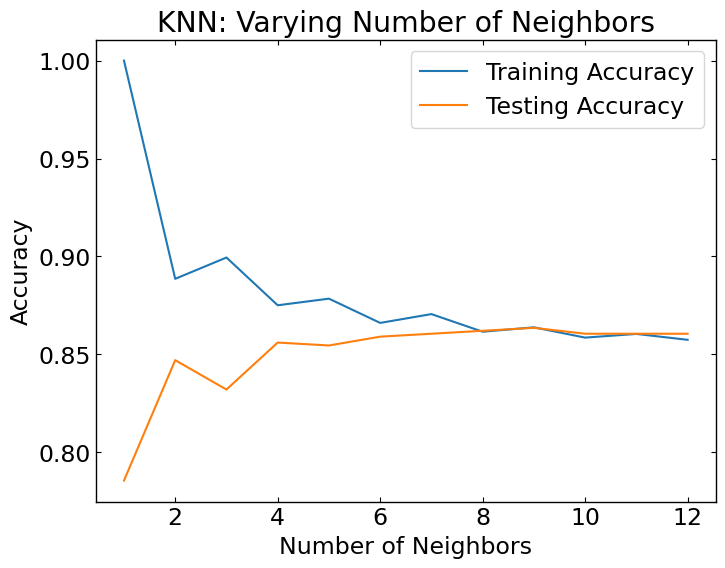

In [15]:
fig, ax = plt.subplots()

ax.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
ax.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

ax.set_title("KNN: Varying Number of Neighbors")
ax.legend()
ax.set_xlabel("Number of Neighbors")
ax.set_ylabel("Accuracy")

# Regression

## Linear Regression

In [16]:
# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape, y.shape)

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

(4546, 1) (4546,)
[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


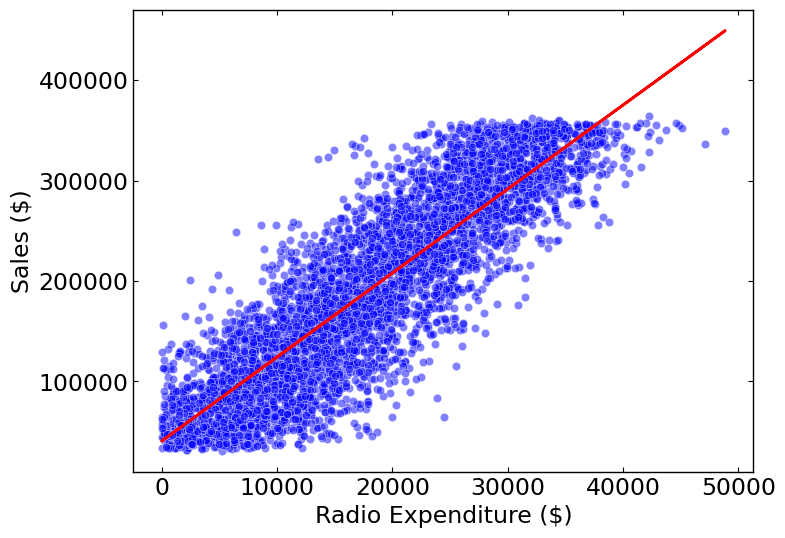

In [17]:
fig, ax = plt.subplots()

sns.scatterplot(x=X[:,0], y=y, color="blue", alpha=0.5, ax=ax)
ax.plot(X, predictions, color="red", lw=2)

ax.set_xlabel("Radio Expenditure ($)")
ax.set_ylabel("Sales ($)");

## Linear Regression w/ multiple features

In [18]:
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


### Regression performance

In [19]:
# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996000956


## Cross-validation for R-squared

In [20]:
# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

cv_results = cv_scores
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]
0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


## Regularized regression: Ridge

Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In [21]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


## Lasso regression for feature importance

In [22]:
# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

[ 3.56256962 -0.00397035  0.00496385]


['tv' 'radio' 'social_media']


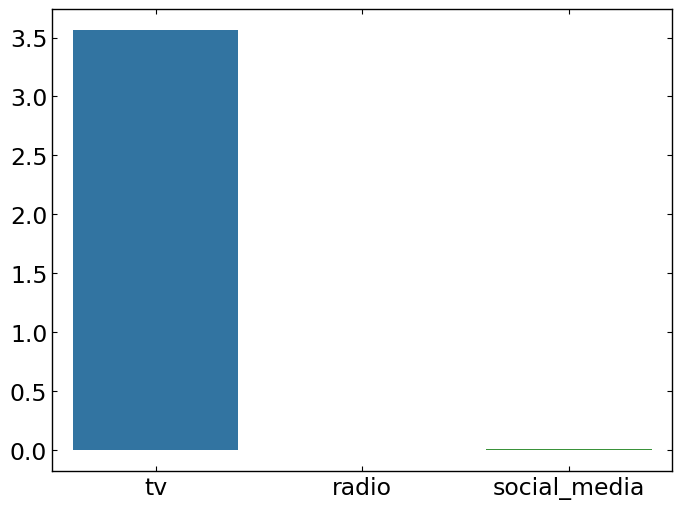

In [23]:
sales_columns = sales_df.drop(columns='sales').columns.values
print(sales_columns)

sns.barplot(x=sales_columns, y=lasso_coef);

# Fine-Tuning your Model

In [24]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
X = diabetes_df.drop(columns="diabetes").values
y = diabetes_df["diabetes"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



## Logistic regression and the ROC curve

ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

In [26]:
# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.26551035 0.18336492 0.12119562 0.15613588 0.49611341 0.44582259
 0.01359228 0.61646143 0.55640555 0.79311921]


/Users/astrodoo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


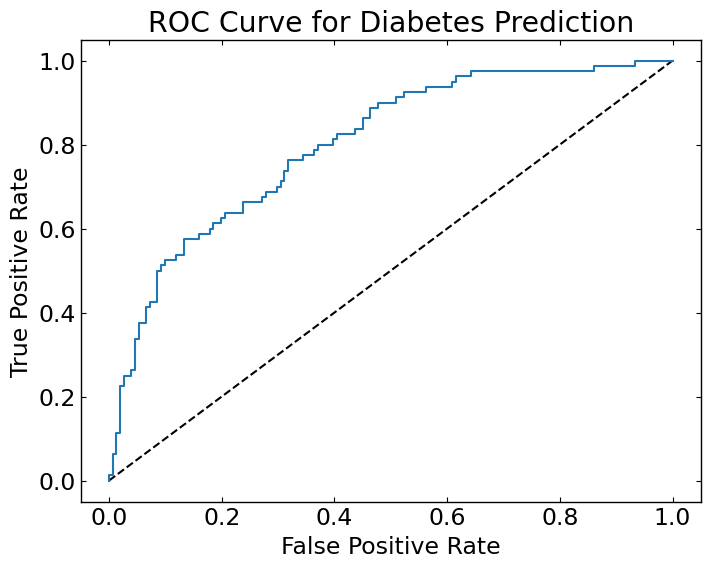

In [27]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

fig, ax = plt.subplots()

ax.plot([0, 1], [0, 1], 'k--')

ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for Diabetes Prediction');

In [28]:
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8002483443708608
[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



## Hyperparameter tuning

### w/ GridSearchCV

In [29]:
kf = KFold(n_splits=6, shuffle=True, random_state=5)

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 0.10527210526315789}
Tuned lasso score: 0.2905288091394486


### RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use RandomizedSearchCV, which tests a fixed number of hyperparameter settings from specified probability distributions.

In [30]:
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

/Users/astrodoo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/astrodoo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Tuned Logistic Regression Parameters: {'tol': 0.28578571428571425, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.7795918367346939}
Tuned Logistic Regression Best Accuracy Score: 0.7595713691219309


/Users/astrodoo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/astrodoo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

# Preprocessing and Pipelines

## Creating dummy variables

Being able to include categorical features in the model building process can enhance performance as they may add information that contributes to prediction accuracy.

In [31]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

Shape of music_dummies: (1000, 20)


In [32]:
# Create X and y
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"]

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 8.179520164405014
Standard Deviation of the target array: 14.021569099070218


## Handling missing data

In [33]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())   # the dataset is already cleaned.

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Shape of the `music_df`: (1000, 12)


In [34]:
music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
584,0.0,0.928,0.382,588400.0,0.1610,0.559,0.120,-19.090,0.0535,93.319,0.2660,0
585,0.0,0.956,0.332,194053.0,0.1880,0.929,0.137,-20.450,0.0446,136.270,0.0550,0
547,0.0,0.986,0.343,259040.0,0.0153,0.908,0.181,-30.433,0.0453,169.220,0.1020,0
928,2.0,0.498,0.539,55101.0,0.4530,0.875,0.106,-21.199,0.0684,82.184,0.7640,0
930,6.0,0.978,0.239,708760.0,0.0514,0.874,0.101,-23.135,0.0451,110.333,0.0388,0


## Pipeline

In [35]:
# Re-load the dataset
music_df = pd.read_csv(os.path.join(datadir,'music_clean.csv'))

In [36]:
music_df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [37]:
# Create X and y
X = music_df.drop("genre", axis=1).values
y = music_df["genre"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer),
        ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[130  20]
 [  0 150]]


## Centering and Scaling

In [39]:
# Create X and y
X = music_df.drop("loudness", axis=1).values
y = music_df["loudness"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

0.7185052514704712


### build a pipeline for cross-validation

In [40]:
# Create X and y
X = music_df.drop("genre", axis=1).values
y = music_df["genre"]

# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.9275 
 {'logreg__C': 0.5793684210526315}


## Evaluating multiple models

In [41]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

#print(results)

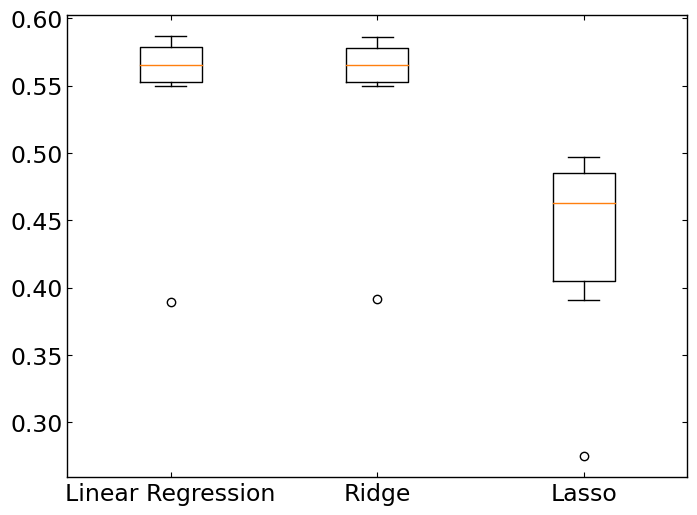

In [42]:
# Create a box plot of the results
fig, ax = plt.subplots()
ax.boxplot(results, labels=models.keys());

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 0.34345465240728146
Ridge Test Set RMSE: 0.3434572782677875
Lasso Test Set RMSE: 0.3870088311279566


In [44]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)

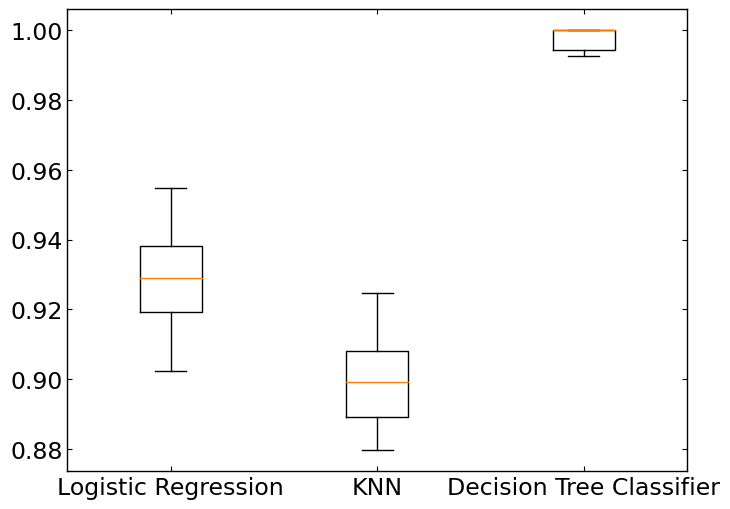

In [45]:
# Create a box plot of the results
fig, ax = plt.subplots()
ax.boxplot(results, labels=models.keys());

In [46]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 0.556, 'logreg__solver': 'newton-cg'}, Accuracy: 0.88
